In [173]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

In [174]:
iris = datasets.load_iris()
data = iris.data
target = iris.target
print(data.shape)

(150, 4)


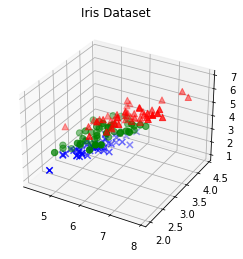

In [175]:
# Plot Original 3D Distribution
def Plot3D(data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[0:50, 0], data[0:50, 1], data[0:50, 2],
               marker='x', color='blue', s=40, label='Setosa')
    ax.scatter(data[50:100, 0], data[50:100, 1], data[50:100, 2],
               marker='o', color='green', s=40, label='Versicolour')
    ax.scatter(data[100:150, 0], data[100:150, 1], data[100:150, 2],
               marker='^', color='red', s=40, label='Virginica')
    plt.title('Iris Dataset')
    plt.show()
def Plot2D(data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(data[0:50, 0], data[0:50, 1],
               marker='x', color='blue', s=40, label='Setosa')
    ax.scatter(data[50:100, 0], data[50:100, 1],
               marker='o', color='green', s=40, label='Versicolour')
    ax.scatter(data[100:150, 0], data[100:150, 1],
               marker='^', color='red', s=40, label='Virginica')
    plt.title('Iris Dataset')
    plt.show()
Plot3D(data)

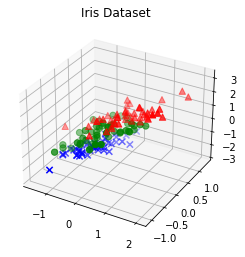

[4.20005343 0.24105294 0.0776881  0.02367619]
0.9947878161267244


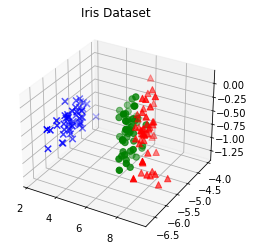

In [176]:
# PCA
def PCA(X, num):
    # Centered
    mean = np.average(X, axis=0)
    XC = X - mean
    Plot3D(XC)
    # Compute Covariance Matrix
    Cov = (1 / len(X)) * np.dot(XC.T, XC)
    lbd, W = np.linalg.eig(Cov)
    idx = lbd.argsort()[::-1]
    lbd = lbd[idx]
    W = W[:, idx]
    print(lbd)
    # Compute Variance Contribution Rate
    R = np.sum(lbd[:num]) / np.sum(lbd)
    print(R)
    # Re-Build
    W_PCA = W[:, :num]
    Y = np.transpose(np.dot(W_PCA.T, X.T))
    Plot3D(Y)
    return Y
Y = PCA(data, 3)

In [177]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, shuffle=True)
# SVM
svm = LinearRegression()
# Direct
svm.fit(data_train, target_train)
acc = svm.score(data_test, target_test)
print(acc)
# PCA
data_train, data_test, target_train, target_test = train_test_split(Y, target, test_size=0.3, shuffle=True)
svm.fit(data_train, target_train)
acc = svm.score(data_test, target_test)
print(acc)

0.9166234122153645
0.9350531549129187
